In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [294]:
def monte_carlo_simulation(pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    prob_s = 0.006
    prob_a = 0.0705
    prob_b = 0.9235
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    is_guarantee = False
                    roll_to_limited_s.append(i+1)
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s}\nprobability A: {prob_a}\nprobability B: {prob_b}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s}\nProbabilitas A: {cum_prob_a}\nProbabilitas B: {cum_prob_b}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b

## Input pity awal dan total simulasi

In [303]:
pity_awal = 11
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 11


## Jalankan Simulasi

In [304]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b = monte_carlo_simulation(pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.006
probability A: 0.0705
probability B: 0.9235

Probabilitas Kumulatif
Probabilitas S: 0.006
Probabilitas A: 0.0765
Probabilitas B: 1.0


## Hasil Simulasi

In [305]:
#jumlah total karakter S 
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 9597
S: 14334
A: 129460
B: 856206

Probabilitas karakter 
---------------------
Limited S: 0.96%
S: 1.43%
A: 12.95%
B: 85.62%


### Karakter S in General

In [306]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

first_roll = rolls_to_get_s[0]+pity_awal
interval_rolls_to_s = [first_roll] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
pull_needed = average_s - pity_awal 
print(f'Pull needed to get the character based on pity awal : {pull_needed:.0f} Pulls')
print(f'Cost needed to get limited character S: {pull_needed*roll_cost:.0f} Polychromes')


amount_pity_s = interval_rolls_to_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [79, 169, 259, 349, 360, 426, 516, 606, 613, 703, 751, 799, 843, 933, 942, 1032, 1047, 1137, 1182, 1270, 1360, 1450, 1461, 1551, 1576, 1666, 1756, 1801, 1839, 1929, 1943, 2012, 2050, 2140, 2230, 2231, 2321, 2411, 2501, 2509, 2599, 2689, 2779, 2819, 2909, 2999, 3089, 3179, 3269, 3345, 3428, 3430, 3465, 3555, 3645, 3735, 3759, 3778, 3808, 3898, 3988, 3990, 4004, 4084, 4174, 4196, 4197, 4242, 4332, 4422, 4512, 4532, 4622, 4654, 4680, 4770, 4805, 4895, 4938, 4993, 5083, 5124, 5135, 5151, 5241, 5331, 5421, 5511, 5569, 5625, 5715, 5805, 5895, 5985, 6031, 6121, 6211, 6301, 6391, 6451, 6463, 6553, 6636, 6726, 6788, 6878, 6913, 7003, 7093, 7183, 7273, 7363, 7376, 7437, 7481, 7512, 7576, 7642, 7655, 7745, 7811, 7817, 7907, 7954, 8044, 8127, 8136, 8226, 8316, 8379, 8469, 8559, 8649, 8739, 8759, 8849, 8886, 8951, 9003, 9093, 9183, 9273, 9363, 9366, 9456, 9500, 9590, 9648, 9670, 9754, 9844, 9934, 10024, 10114, 10204, 10294, 10384, 10474, 10553, 10567, 10657,

### Karakter Limited S

In [307]:
print(roll_to_limited_s)
#Check if got limited character S first
#Kalo gadapet limited duluan gaperlu ditambah dg pity awal
first_roll = roll_to_limited_s[0] if rolls_to_get_s[0]<roll_to_limited_s[0] else roll_to_limited_s[0] + pity_awal

interval_limited_s = [first_roll] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky {(amount_pity_s/total_sim)*100:.3f}%')

[79, 169, 349, 360, 426, 606, 703, 751, 843, 933, 1032, 1047, 1137, 1270, 1450, 1461, 1576, 1666, 1756, 1839, 1943, 2012, 2050, 2230, 2321, 2411, 2501, 2509, 2599, 2689, 2819, 2909, 2999, 3179, 3269, 3428, 3465, 3555, 3645, 3735, 3759, 3808, 3898, 3988, 3990, 4004, 4174, 4197, 4332, 4512, 4532, 4654, 4680, 4770, 4805, 4938, 5083, 5135, 5241, 5421, 5569, 5625, 5715, 5895, 6031, 6211, 6301, 6391, 6463, 6553, 6726, 6878, 7003, 7183, 7363, 7437, 7512, 7576, 7642, 7745, 7811, 7907, 7954, 8044, 8136, 8316, 8469, 8649, 8759, 8849, 8951, 9093, 9183, 9363, 9366, 9500, 9590, 9670, 9754, 9934, 10024, 10114, 10204, 10384, 10474, 10553, 10657, 10698, 10878, 10966, 11056, 11146, 11236, 11248, 11348, 11528, 11564, 11641, 11731, 11907, 12063, 12243, 12333, 12456, 12636, 12816, 12978, 13076, 13137, 13317, 13407, 13497, 13622, 13712, 13802, 13982, 14075, 14165, 14195, 14311, 14483, 14560, 14675, 14679, 14769, 14788, 14922, 15102, 15197, 15287, 15331, 15421, 15511, 15523, 15613, 15740, 15830, 15920, 1604

## Tabel

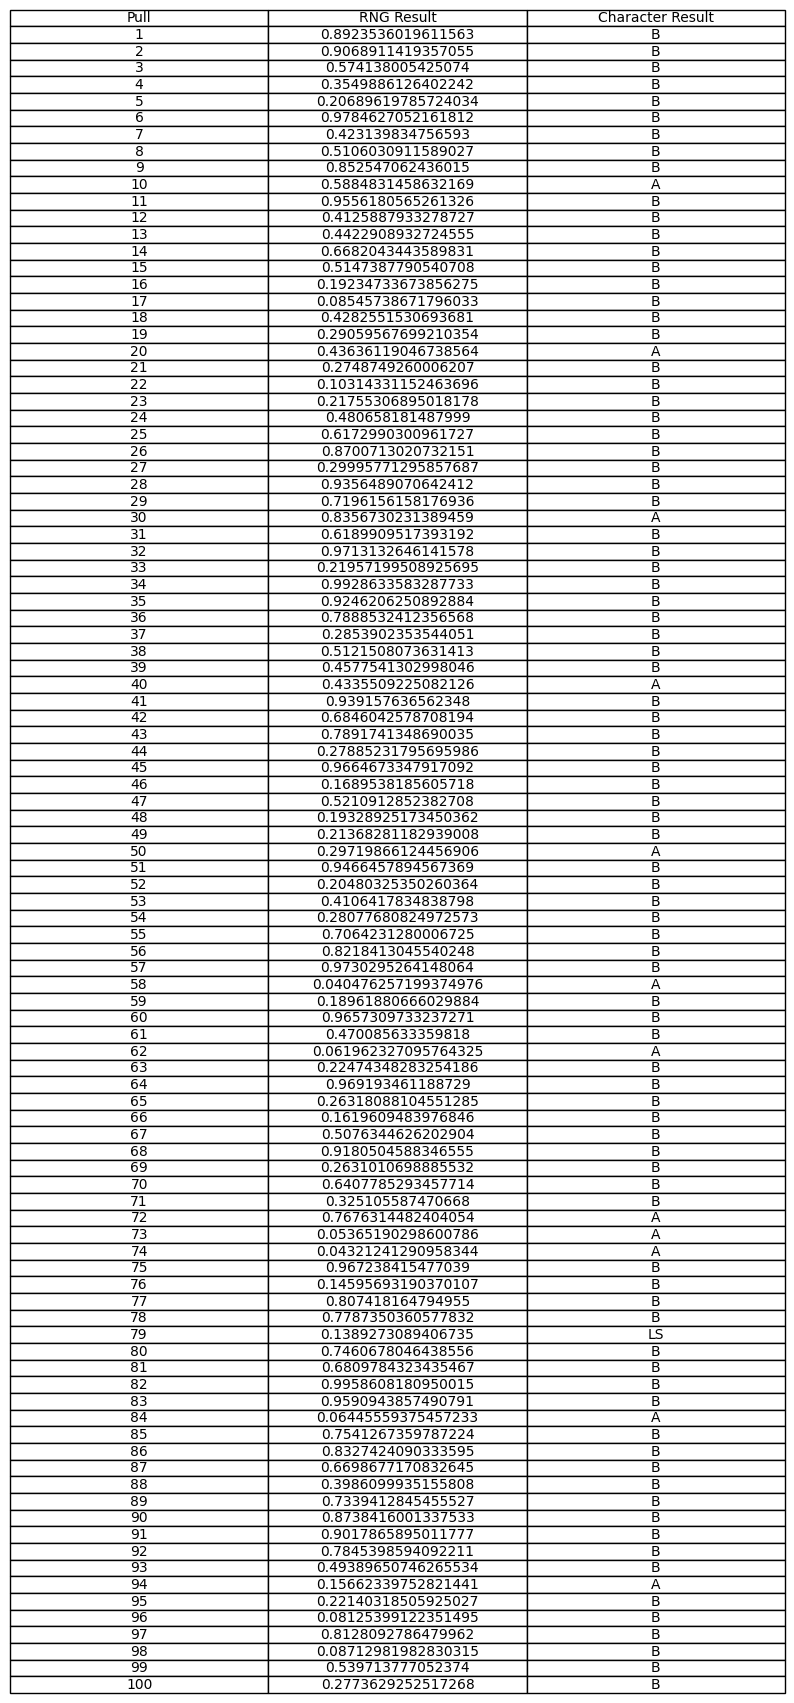

In [311]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()

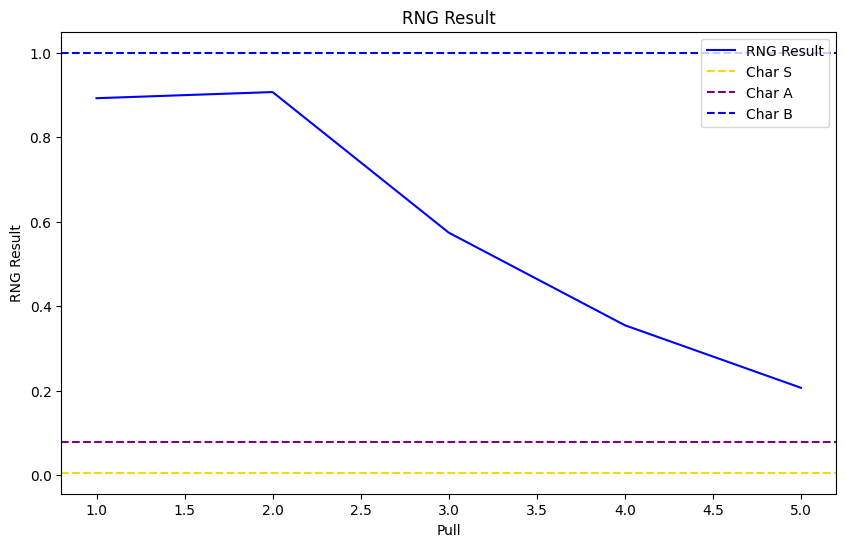

In [309]:
plt.figure(figsize=(10, 6))
plt.plot(df['Pull'].head(5), df['RNG Result'].head(5), color='blue', label='RNG Result')
plt.axhline(y=0.006, color='gold', linestyle='--', label='Char S')
plt.axhline(y=0.078, color='purple', linestyle='--', label='Char A')
plt.axhline(y=1, color='blue', linestyle='--', label='Char B')
plt.xlabel('Pull')
plt.ylabel('RNG Result')
plt.title('RNG Result')
plt.legend(loc='upper right')
plt.show()